In [2]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

sns.set(color_codes=True)
%matplotlib inline

In [3]:
diabetes = pd.read_csv('datasets/diabetes.csv')
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


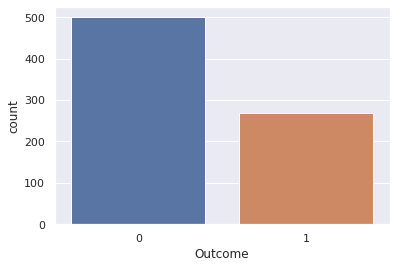

In [7]:
sns.countplot(diabetes['Outcome'],label="Count")

### Check for null values

In [8]:
print(diabetes.isnull().values.any())

False


### Check for zero

In [9]:
print("# rows in dataframe {0}".format(len(diabetes)))
print("# rows missing Pregnancies: {0}".format(len(diabetes.loc[diabetes['Pregnancies'] == 0])))
print("# rows missing Glucose: {0}".format(len(diabetes.loc[diabetes['Glucose'] == 0])))
print("# rows missing BloodPressure: {0}".format(len(diabetes.loc[diabetes['BloodPressure'] == 0])))
print("# rows missing Insulin: {0}".format(len(diabetes.loc[diabetes['Insulin'] == 0])))
print("# rows missing BMI: {0}".format(len(diabetes.loc[diabetes['BMI'] == 0])))
print("# rows missing SkinThickness: {0}".format(len(diabetes.loc[diabetes['SkinThickness'] == 0])))
print("# rows missing Age: {0}".format(len(diabetes.loc[diabetes['Age'] == 0])))
print("# rows missing DiabetesPedigreeFunction: {0}".format(len(diabetes.loc[diabetes['DiabetesPedigreeFunction'] == 0])))

# rows in dataframe 768
# rows missing Pregnancies: 111
# rows missing Glucose: 5
# rows missing BloodPressure: 35
# rows missing Insulin: 374
# rows missing BMI: 11
# rows missing SkinThickness: 227
# rows missing Age: 0
# rows missing DiabetesPedigreeFunction: 0


## Splitting the dataset

In [10]:
y = diabetes['Outcome']
x = diabetes.drop(['Outcome'], axis = 1)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y, random_state = 66)

In [12]:
print("{0:0.2f}% in training set".format(len(X_train) / len(diabetes.index) * 100))
print("{0:0.2f}% in test set".format(len(X_test) /  len(diabetes.index) * 100))

75.00% in training set
25.00% in test set


### Impute with the mean

In [13]:
from sklearn.impute import SimpleImputer

fill_0 = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

### Correlated Feature Check

In [14]:
def plot_corr(data_frame, size=11):
    corr = data_frame.corr()   
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   
    plt.xticks(range(len(corr.columns)), corr.columns)  
    plt.yticks(range(len(corr.columns)), corr.columns)  


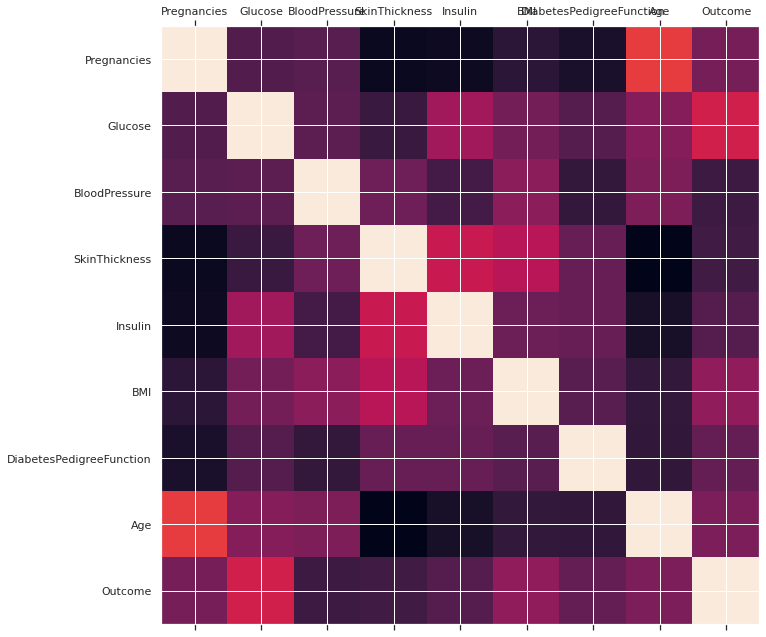

In [15]:
plot_corr(diabetes)

In [16]:
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# K-NN Classfication

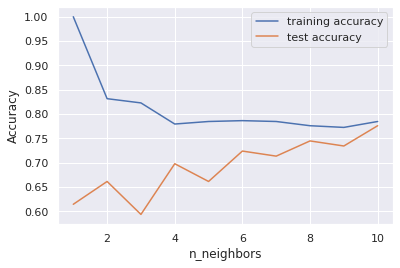

In [17]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [18]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.78
Accuracy of K-NN classifier on test set: 0.78


# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C = 1000).fit(X_train, y_train)

In [20]:
print("Training set accuracy: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg.score(X_test, y_test)))

Training set accuracy: 0.795
Test set accuracy: 0.792


# Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.776
Accuracy on test set: 0.750


## Feature importance in Decision trees

[0.         0.65122417 0.         0.         0.00230354 0.27219163
 0.         0.07428066]


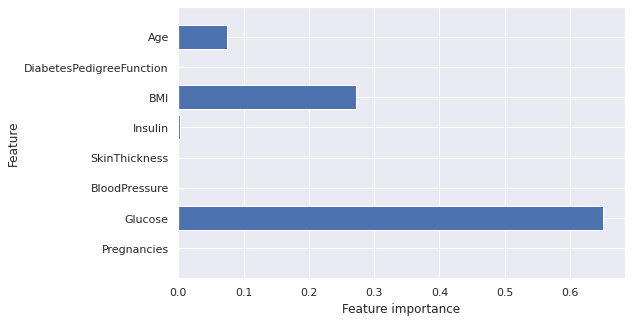

In [22]:
def plot_feature_importances_diabetes(model):
    print(model.feature_importances_)
    diabetes_features = x.columns
    plt.figure(figsize=(8, 5))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_diabetes(tree)

Feature "Glucose" is by far the most important feature.

# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.797
Accuracy on test set: 0.781


## Feature importance in Random Forest

[0.06618989 0.3435526  0.034967   0.05450159 0.10671929 0.20333632
 0.08492475 0.10580857]


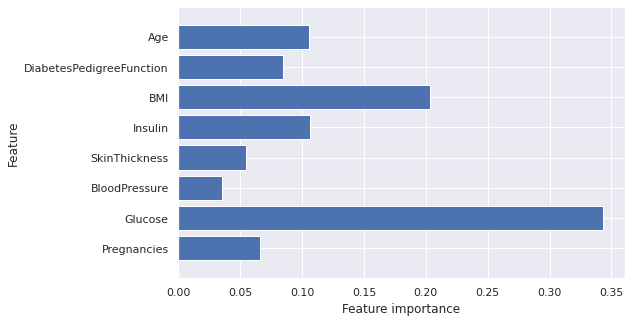

In [24]:
plot_feature_importances_diabetes(rf)

Similarly to the single decision tree, the random forest also gives a lot of importance to the “Glucose” feature, but it also chooses “BMI” to be the 2nd most informative feature overall. The randomness in building the random forest forces the algorithm to consider many possible explanations, the result being that the random forest captures a much broader picture of the data than a single tree.

# Gradient Boosting

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0, max_depth=1)
gb.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

Accuracy on training set: 0.804
Accuracy on test set: 0.776


[0.02125592 0.57100904 0.         0.00178359 0.02677718 0.24067163
 0.06276073 0.0757419 ]


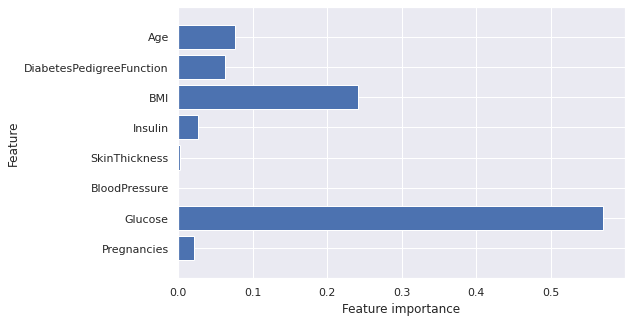

In [26]:
plot_feature_importances_diabetes(gb)

We can see that the feature importances of the gradient boosted trees are somewhat similar to the feature importances of the random forests, it gives weight to all of the features in this case.

# Support Vector Machine (SVM)

In [27]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc = SVC(C = 10, probability = True)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.84
Accuracy on test set: 0.80


# Neural Networks

In [28]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)

# mlp = MLPClassifier(random_state=0)
# mlp.fit(X_train_scaled, y_train)

# print("Accuracy on training set: {:.3f}".format(
#     mlp.score(X_train_scaled, y_train)))
# print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

We have obtained the highest test accuracy so for.

# Predecting 

In [29]:
def get_xinput(x):
    x_array = list()
    for i in x.columns:
        input_ = float(input("Enter '{}' of the person.".format(i)))
        x_array.append(input_)
    return np.array(x_array).reshape(1, -1)

def predect(model, x_input):
    return model.predict_proba(x_input)

In [30]:
def print_in_format(model, predection):
    print("According to {}, there is a {}% chance the person has diabetes".format(model, round((predection[0][1])*100), 2))

In [31]:
x_input_array = get_xinput()

In [32]:
knn_predection = predect(knn, x_input_array)
logreg_predection = predect(logreg, x_input_array)
tree_predection = predect(tree, x_input_array)
rf_predection = predect(rf, x_input_array)
gb_predection = predect(gb, x_input_array)
svc_predection = predect(svc, x_input_array)
# mlp_predection = predect(mlp, x_input_array)

In [33]:
print_in_format("K-NN", knn_predection)
print_in_format("Logistic Regression", logreg_predection)
print_in_format("Decion-Tree", tree_predection)
print_in_format("Random Forest", rf_predection)
print_in_format("Gradient Boosting", gb_predection)
print_in_format("SVM", svc_predection)
# print_in_format("Neural Network", mlp_predection)

According to K-NN, there is a 10.0% chance the person has diabetes
According to Logistic Regression, there is a 4.0% chance the person has diabetes
According to Decion-Tree, there is a 14.0% chance the person has diabetes
According to Random Forest, there is a 9.0% chance the person has diabetes
According to Gradient Boosting, there is a 5.0% chance the person has diabetes
According to SVM, there is a 31.0% chance the person has diabetes
